# 日本の人口データ分析

In [1]:
import pandas as pd

## データの中味確認

In [2]:
pop = pd.read_excel("opendata/jp/6801tjin.xls",header=3)
pop.head()

,Unnamed: 0,Unnamed: 1,男,女,計,Unnamed: 5
0,NaN,合計,50361080,51626940,101988020,27115293
1,10006.0,北海道,2693169,2698688,5391857,1369907
2,20001.0,青森県,740379,766146,1506525,345956
3,30007.0,岩手県,706404,740428,1446832,328157
4,40002.0,宮城県,893165,926068,1819233,423670


In [3]:
pop = pd.read_excel("opendata/jp/7901tjin.xls",header=3)
pop.head()

,Unnamed: 0,Unnamed: 1,男,女,計,Unnamed: 5
0,NaN,合計,56888108,58398667,115286775,35350173
1,10006.0,北海道,2713424,2803901,5517325,1804616
2,20001.0,青森県,755956,786185,1542141,429057
3,30007.0,岩手県,702504,731247,1433751,389764
4,40002.0,宮城県,1002428,1029123,2031551,573172


In [4]:
pop = pd.read_excel("opendata/jp/8001tjin.xls",header=3)
print(len(pop.columns))
pop.head()

19


,Unnamed: 0,Unnamed: 1,男,女,計,Unnamed: 5,転入者数,出生者数,その他,計（Ａ）,転出者数,死亡者数,その他.1,計（Ｂ）,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,NaN,合計,57323504,58871394,116194898,35830857,7545932,1624659,339155,9509746,7525069,707507,369047,8601623,908123,917152,0.8,-9029,0.0
1,10006.0,北海道,2732333,2824627,5556960,1837008,442994,78133,4256,525383,448609,31828,5311,485748,39635,46305,0.8,-6670,-0.1
2,20001.0,青森県,758596,789454,1548050,434834,74797,22193,942,97932,80952,9869,1202,92023,5909,12324,0.8,-6415,-0.4
3,30007.0,岩手県,704640,733482,1438122,393876,72481,19706,960,93147,77308,9696,1772,88776,4371,10010,0.7,-5639,-0.4
4,40002.0,宮城県,1013677,1041613,2055290,582627,128022,31584,1467,161073,121624,12561,3149,137334,23739,19023,0.9,4716,0.2


In [5]:
pop = pd.read_excel("opendata/jp/9301tjin.xls",header=3)
print(len(pop.columns))
pop.head()

19


,Unnamed: 0,Unnamed: 1,男,女,計,Unnamed: 5,転入者数,出生者数,その他,計（Ａ）,転出者数,死亡者数,その他.1,計（Ｂ）,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,NaN,合計,60919812,63037646,123957458,43077126,6545540,1210365,124747,7880652,6537682,877099,95710,7510491,370161,333266,0.27,36895,0.03
1,10006.0,北海道,2730350,2925880,5656230,2193479,381122,52787,2986,436895,388764,39770,1960,430494,6401,13017,0.23,-6616,-0.12
2,20001.0,青森県,725163,781087,1506250,494980,60459,14412,892,75763,66417,12054,641,79112,-3349,2358,0.16,-5707,-0.38
3,30007.0,岩手県,691347,736509,1427856,442937,58481,13705,360,72546,59580,11631,365,71576,970,2074,0.15,-1104,-0.08
4,40002.0,宮城県,1116354,1156408,2272762,731291,138583,22945,1267,162795,131357,15068,927,147352,15443,7877,0.35,7566,0.34


In [6]:
pop = pd.read_excel("opendata/jp/9401tjin.xls",header=3)
print(len(pop.columns))
pop.head()

20


,Unnamed: 0,Unnamed: 1,男,女,計,Unnamed: 5,転入者数,出生者数,その他,計（Ａ）,転出者数,死亡者数,その他.1,計（Ｂ）,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,NaN,合計,61086642,63236159,124322801,43665843,6652360,1197862,119955,7970177,6668494,863509,72831,7604834,365343,0.29,334353,0.27,30990,0.03
1,10006.0,北海道,2732864,2932835,5665699,2223599,377893,50994,2832,431719,381544,38645,2061,422250,9469,0.17,12349,0.22,-2880,-0.05
2,20001.0,青森県,725266,781771,1507037,500884,61740,14378,645,76763,63527,11854,595,75976,787,0.05,2524,0.17,-1737,-0.12
3,30007.0,岩手県,691647,736999,1428646,447931,58002,13508,408,71918,59280,11520,328,71128,790,0.06,1988,0.14,-1198,-0.08
4,40002.0,宮城県,1123358,1163383,2286741,745210,139659,21877,1209,162745,133016,14819,931,148766,13979,0.62,7058,0.31,6921,0.30


In [7]:
pop = pd.read_excel("opendata/jp/1201tjin.xls",header=3)
print(len(pop.columns))
pop.head()

20


,Unnamed: 0,Unnamed: 1,男,女,計,Unnamed: 5,転入者数,出生者数,その他,計（Ａ）,転出者数,死亡者数,その他.1,計（Ｂ）,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,NaN,合計,61842865,64816818,126659683,54171475,5177080,1049553,83827,6310460,5252534,1256125,65528,6574187,-263727,-0.207784,-206572,-0.162753,-57155,-0.045031
1,10006.0,北海道,2592061,2882155,5474216,2685761,256525,39179,1813,297517,263279,57761,1177,322217,-24700,-0.449179,-18582,-0.337921,-6118,-0.111258
2,20001.0,青森県,655598,727445,1383043,577351,38905,9488,548,48941,44632,16672,480,61784,-12843,-0.920061,-7184,-0.514655,-5659,-0.405406
3,30007.0,岩手県,632865,684930,1317795,506306,43473,9347,592,53412,49205,21031,195,70431,-17019,-1.275009,-11684,-0.875328,-5335,-0.399681
4,40002.0,宮城県,1120196,1182510,2302706,918304,127019,18274,1785,147078,133416,29150,762,163328,-16250,-0.700746,-10876,-0.469004,-5374,-0.231742


In [8]:
pop = pd.read_excel("opendata/jp/1301stjin.xls",header=3)
print(len(pop.columns))
pop.head()

24


,Unnamed: 0,Unnamed: 1,男,女,計,Unnamed: 5,転入者数（国内）,転入者数（国外）,転入者数（計）,出生者数,...,転出者数（計）,死亡者数,その他（計）.1,計（Ｂ）,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23
0,NaN,合計,62588804,65785075,128373879,55577563,5113781,288138,5401919,1039574,...,5387867,1260777,200467,6849111,1714196,NaN,-221203,NaN,1935399,NaN
1,10006.0,北海道,2583864,2881587,5465451,2709610,196913,4980,201893,38382,...,212603,58723,3192,274518,-8765,NaN,-20341,NaN,11576,NaN
2,20001.0,青森県,649775,722235,1372010,581393,37469,856,38325,9107,...,45045,17344,588,62977,-11033,NaN,-8237,NaN,-2796,NaN
3,30007.0,岩手県,630345,683835,1314180,512115,39206,1100,40306,9224,...,42311,15816,693,58820,-3615,NaN,-6592,NaN,2977,NaN
4,40002.0,宮城県,1127994,1190698,2318692,937269,111218,2996,114214,18764,...,108443,22073,1405,131921,15986,NaN,-3309,NaN,19295,NaN


In [9]:
pop = pd.read_excel("opendata/jp/2001stjin.xls",header=3)
print(len(pop.columns))
pop.head()

24


,Unnamed: 0,Unnamed: 1,男,女,計,Unnamed: 5,転入者数（国内）,転入者数（国外）,転入者数（計）,出生者数,...,転出者数（計）,死亡者数,その他（計）.1,計（Ｂ）,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23
0,NaN,合計,62036028,65102005,127138033,59071519,5392557,685537,6078094,884767,...,5772422,1386212,181466,7340100,-305530,-0.239737,-501445,-0.393464,195915,0.153727
1,10006.0,北海道,2488629,2779133,5267762,2790286,242721,18253,260974,31174,...,261495,65494,3816,330805,-36651,-0.690953,-34320,-0.647008,-2331,-0.043945
2,20001.0,青森県,604405,671378,1275783,592822,33695,2209,35904,7195,...,41408,18416,573,60397,-16926,-1.309343,-11221,-0.868022,-5705,-0.441321
3,30007.0,岩手県,594846,640671,1235517,528691,36229,2650,38879,7006,...,42292,17849,614,60755,-14625,-1.169867,-10843,-0.867341,-3782,-0.302526
4,40002.0,宮城県,1117911,1174474,2292385,1006676,102631,6195,108826,15058,...,108716,25232,1739,135687,-10713,-0.465156,-10174,-0.441753,-539,-0.023403


## データの読み込み

In [10]:
files = pd.DataFrame([
    ("6801tjin.xls",1,1968),
    ("6901tjin.xls",1,1969),
    ("7001tjin.xls",1,1970),
    ("7101tjin.xls",1,1971),
    ("7201tjin.xls",1,1972),
    ("7301tjin.xls",1,1973),
    ("7401tjin.xls",1,1974),
    ("7501tjin.xls",1,1975),
    ("7601tjin.xls",1,1976),
    ("7701tjin.xls",1,1977),
    ("7801tjin.xls",1,1978),
    ("7901tjin.xls",1,1979),
    ("8001tjin.xls",2,1980),
    ("8101tjin.xls",2,1981),
    ("8201tjin.xls",2,1982),
    ("8301tjin.xls",2,1983),
    ("8401tjin.xls",2,1984),
    ("8501tjin.xls",2,1985),
    ("8601tjin.xls",2,1986),
    ("8701tjin.xls",2,1987),
    ("8801tjin.xls",2,1988),
    ("8901tjin.xls",2,1989),
    ("9001tjin.xls",2,1990),
    ("9101tjin.xls",2,1991),
    ("9201tjin.xls",2,1992),
    ("9301tjin.xls",2,1993),
    ("9401tjin.xls",3,1994),
    ("9501tjin.xls",3,1995),
    ("9601tjin.xls",3,1996),
    ("9701tjin.xls",3,1997),
    ("9801tjin.xls",3,1998),
    ("9901tjin.xls",3,1999),
    ("0001tjin.xls",3,2000),
    ("0101tjin.xls",3,2001),
    ("0201tjin.xls",3,2002),
    ("0301tjin.xls",3,2003),
    ("0401tjin.xls",3,2004),
    ("0501tjin.xls",3.5,2005),
    ("0601tjin.xls",3,2006),
    ("0701tjin.xls",3,2007),
    ("0801tjin.xls",3,2008),
    ("0901tjin.xls",3,2009),
    ("1001tjin.xls",3,2010),
    ("1101tjin.xls",3,2011),
    ("1201tjin.xls",3,2012),
    ("1301stjin.xls",4,2013),
    ("1401stjin.xls",4,2014),
    ("1501stjin.xls",4,2015),
    ("1601stjin.xls",4,2016),
    ("1701stjin.xls",4,2017),
    ("1801stjin.xls",4,2018),
    ("1901stjin.xls",4,2019),
    ("2001stjin.xls",4,2020),
],columns=["filename","type","year"]
)

In [11]:
import numpy as np
for i,f in files.iterrows():
    t = pd.read_excel("opendata/jp/{}".format(f.filename),header=3)
    if (f.type == 1):
        t.columns =["団体コード","都道府県名","男","女","計","世帯数"]
        t.insert(0,"年",f.year)
        t["出生者数"] = np.nan
        t["死亡者数"] = np.nan
        if (i == 0):
            pop = t
        else:
            pop = pd.concat([pop,t],ignore_index=True)
    elif (f.type == 3.5):
        t = t.iloc[:,[0,1,2,3,4,6,9,13]]
        t.columns =["団体コード","都道府県名","男","女","計","世帯数","出生者数","死亡者数"]
        t.insert(0,"年",f.year)
        pop = pd.concat([pop,t],ignore_index=True)
    elif (f.type == 2 or f.type == 3):
        t = t.iloc[:,[0,1,2,3,4,5,7,11]]
        t.columns =["団体コード","都道府県名","男","女","計","世帯数","出生者数","死亡者数"]
        t.insert(0,"年",f.year)
        pop = pd.concat([pop,t],ignore_index=True)
    else:
        t = t.iloc[:,[0,1,2,3,4,5,9,15]]
        t.columns =["団体コード","都道府県名","男","女","計","世帯数","出生者数","死亡者数"]
        t.insert(0,"年",f.year)
        pop = pd.concat([pop,t],ignore_index=True)

In [12]:
pop.head()

,年,団体コード,都道府県名,男,女,計,世帯数,出生者数,死亡者数
0,1968,NaN,合計,50361080,51626940,101988020,27115293,NaN,NaN
1,1968,10006.0,北海道,2693169,2698688,5391857,1369907,NaN,NaN
2,1968,20001.0,青森県,740379,766146,1506525,345956,NaN,NaN
3,1968,30007.0,岩手県,706404,740428,1446832,328157,NaN,NaN
4,1968,40002.0,宮城県,893165,926068,1819233,423670,NaN,NaN


In [13]:
pop_all = pop.loc[pop["都道府県名"]=="合計"].reset_index().drop(["index","団体コード","都道府県名"],axis=1)

In [14]:
pop_all.tail()

,年,男,女,計,世帯数,出生者数,死亡者数
48,2016,62464685,65601526,128066211,56950757,1024041.0,1302840.0
49,2017,62394275,65512811,127907086,57477037,997781.0,1316305.0
50,2018,62298889,65408370,127707259,58007536,964690.0,1347710.0
51,2019,62174142,65269421,127443563,58527117,937542.0,1370751.0
52,2020,62036028,65102005,127138033,59071519,884767.0,1386212.0


## データを検証

In [15]:
all(pop_all["男"] + pop_all["女"] == pop_all["計"])

True

## 前年データを追加

In [16]:
pop_all_last = pop_all.copy()

In [17]:
import numpy as np
pop_all_last.index = np.arange(1,len(pop_all_last)+1)

In [18]:
pop_all.loc[1:,"前年計"] = pop_all_last.iloc[:]["計"]
pop_all.loc[1:,"前年男"] = pop_all_last.iloc[:]["男"]
pop_all.loc[1:,"前年女"] = pop_all_last.iloc[:]["女"]

## 差分を計算

In [19]:
pop_all["前年差異計"] = pop_all["計"] - pop_all["前年計"]
pop_all["前年差異男"] = pop_all["男"] - pop_all["前年男"]
pop_all["前年差異女"] = pop_all["女"] - pop_all["前年女"]


## 描画

In [20]:
import matplotlib.pyplot as plt
%matplotlib notebook
#%matplotlib inline

<IPython.core.display.Javascript object>


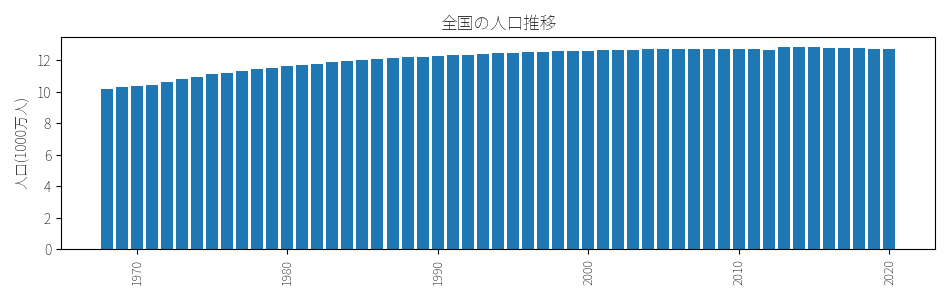

In [21]:
fig = plt.figure(figsize=(9.5,3))
#plt.subplot(1,1,1) # (rows, columns, panel number)
plt.title("全国の人口推移")
plt.xticks(rotation="90",fontsize=9)
plt.bar(pop_all["年"], pop_all["計"]/1000/1000/10)
plt.ylabel("人口(1000万人)")
plt.tight_layout()

<IPython.core.display.Javascript object>


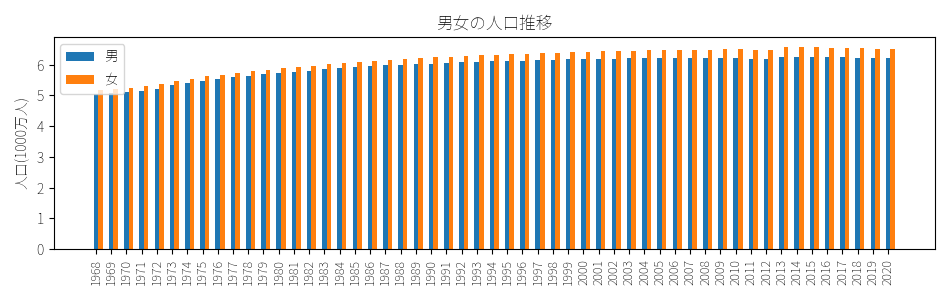

In [22]:
fig = plt.figure(figsize=(9.5,3))
#plt.subplot(1,1,1) # (rows, columns, panel number)
plt.title("男女の人口推移")
plt.xticks(rotation="90",fontsize=9)
width=0.3
plt.bar(pop_all["年"], pop_all["男"]/1000/1000/10,width=width,align="center",label="男")
plt.bar(pop_all["年"]+width, pop_all["女"]/1000/1000/10,width=width,align="center",label="女")
plt.xticks(pop_all["年"])
plt.ylabel("人口(1000万人)")
plt.legend()
plt.tight_layout()

<IPython.core.display.Javascript object>


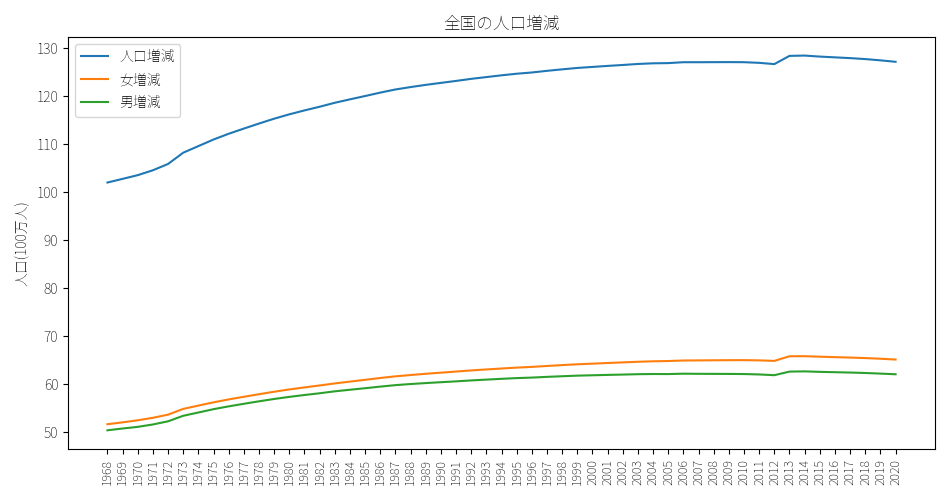

In [23]:
fig = plt.figure(figsize=(9.5,5))
#plt.subplot(1,1,1) # (rows, columns, panel number)
plt.title("全国の人口増減")
plt.xticks(rotation="90",fontsize=9)
plt.plot(pop_all["年"], pop_all["計"]/1000/1000,label="人口増減")
plt.plot(pop_all["年"], pop_all["女"]/1000/1000,label="女増減")
plt.plot(pop_all["年"], pop_all["男"]/1000/1000,label="男増減")
plt.xticks(pop_all["年"])
plt.ylabel("人口(100万人)")
plt.legend()
plt.tight_layout()

<IPython.core.display.Javascript object>


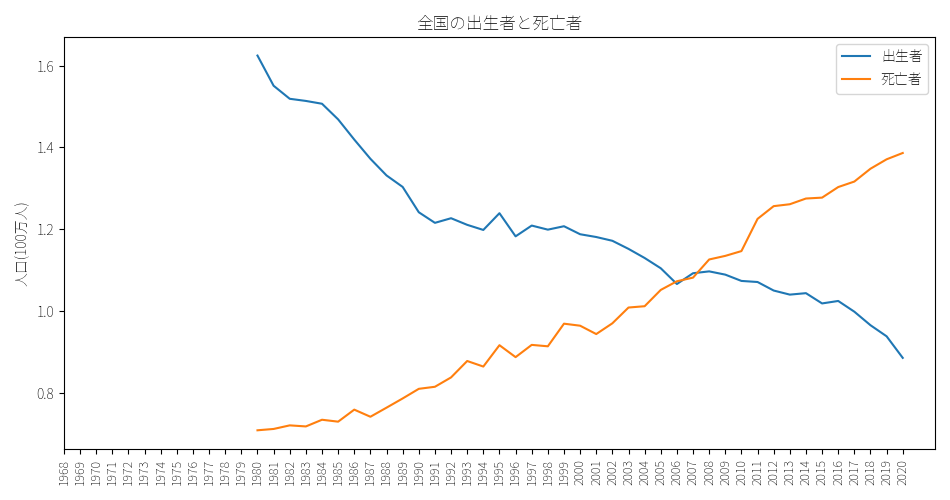

In [24]:
fig = plt.figure(figsize=(9.5,5))
#plt.subplot(1,1,1) # (rows, columns, panel number)
plt.title("全国の出生者と死亡者")
plt.xticks(rotation="90",fontsize=9)
plt.plot(pop_all["年"], pop_all["出生者数"]/1000/1000,label="出生者")
plt.plot(pop_all["年"], pop_all["死亡者数"]/1000/1000,label="死亡者")
plt.xticks(pop_all["年"])
plt.ylabel("人口(100万人)")
plt.legend()
plt.tight_layout()

<IPython.core.display.Javascript object>


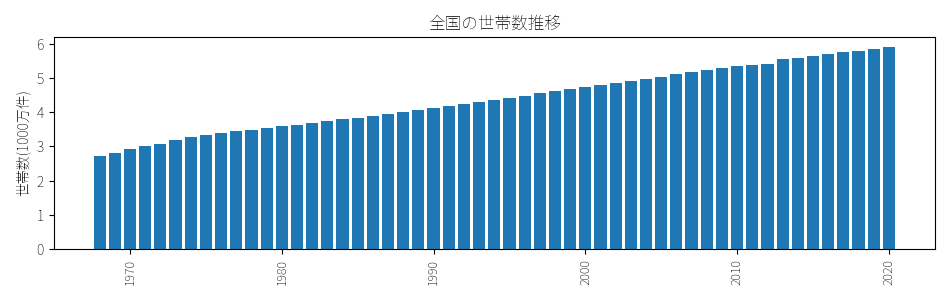

In [25]:
fig = plt.figure(figsize=(9.5,3))
#plt.subplot(1,1,1) # (rows, columns, panel number)
plt.title("全国の世帯数推移")
plt.xticks(rotation="90",fontsize=9)
plt.bar(pop_all["年"], pop_all["世帯数"]/1000/1000/10)
plt.ylabel("世帯数(1000万件)")
plt.tight_layout()

<IPython.core.display.Javascript object>


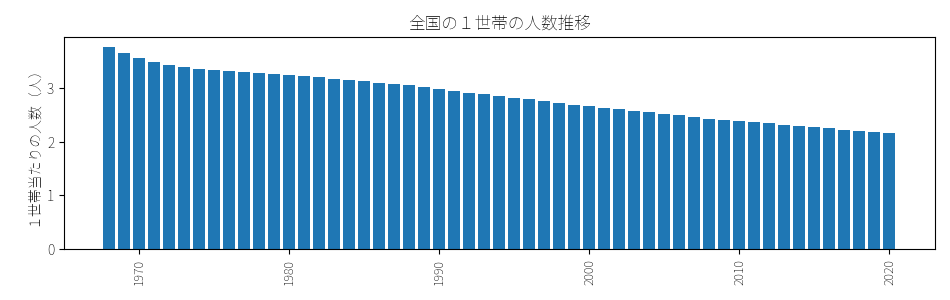

In [26]:
fig = plt.figure(figsize=(9.5,3))
#plt.subplot(1,1,1) # (rows, columns, panel number)
plt.title("全国の１世帯の人数推移")
plt.xticks(rotation="90",fontsize=9)
plt.bar(pop_all["年"], pop_all["計"] / pop_all["世帯数"])
plt.ylabel("１世帯当たりの人数（人）")
plt.tight_layout()